#### Nom du projet: 
Spam SMS

#### Participatns: 
Célia Mato et César Parra

#### Objectifs du projet: 
Le but de ce projet est de concevoir un classifieur de détection automatique de SPAM sans utilisation du Natural Language Processing. Une première partie du projet nous permettra de préparer les données puis dans une seconde partie, un ou plusieurs modèles de classification seront entraînés et adaptés à la problématique

#### Schéma fonctionnel du projet

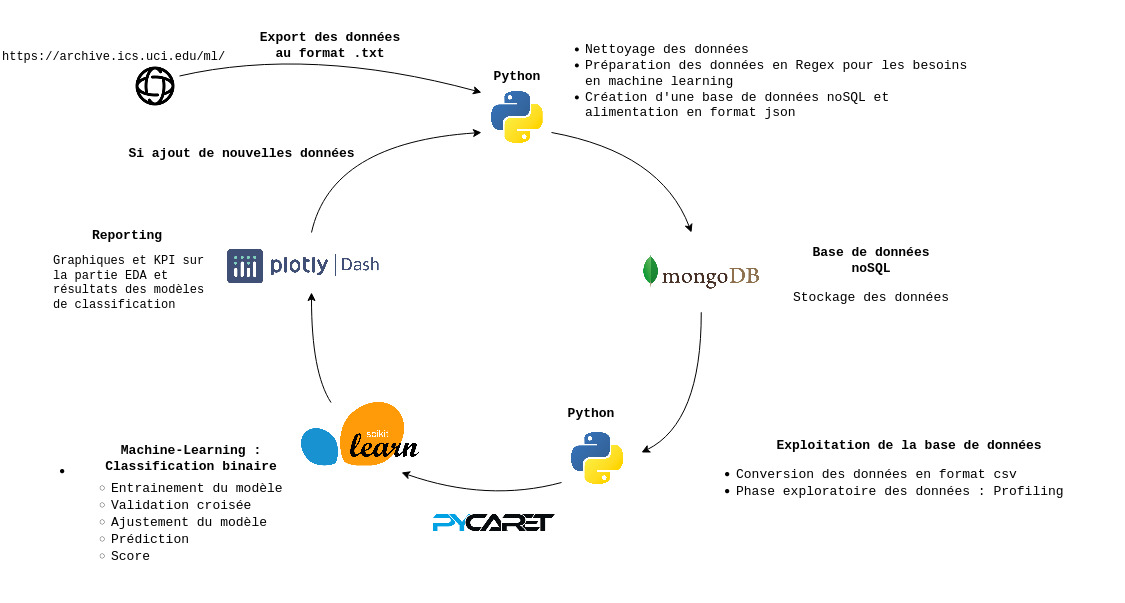

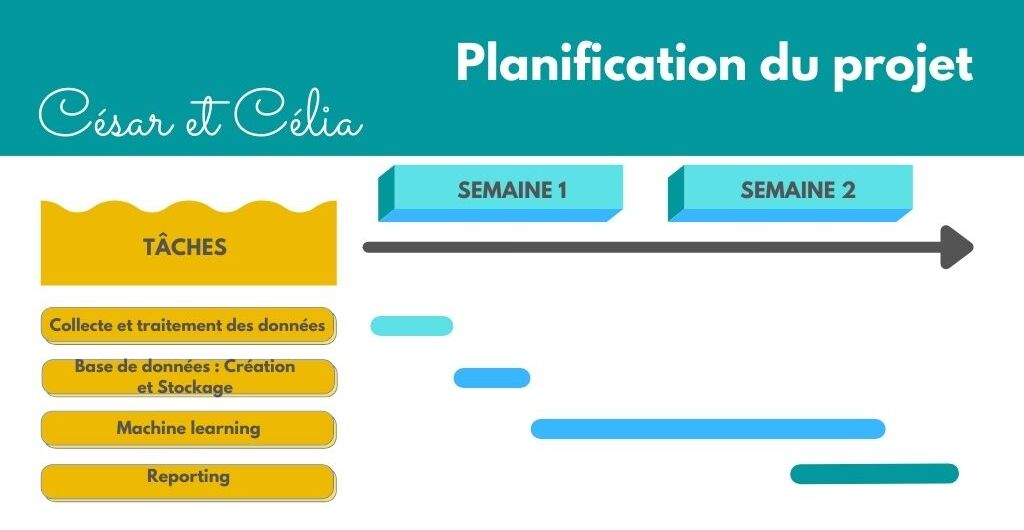

#### Importation de librairies

In [2]:
# connexion avec la base de données
#from pymongo import MongoClient
import sqlite3

# traitement des données
import json
# import requests
import pandas as pd
import re
import os

# graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib
matplotlib.use('TkAgg') # o 'Qt5Agg' # Esto es solo para ver los graficos en Vscode


# nuage de mots
import numpy as np
from PIL import Image
# from wordcloud import WordCloud

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler, FunctionTransformer


# import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 

# Score of models
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Save models
import pickle

# Regression test
import unittest

In [2]:
# !pip install nltk

#### Sauvegarde et extraction de données dans la base de données SqLite3
#Trouver de nouvelles features avec regex

In [3]:
# # Connect to the database
# conn = sqlite3.connect("databaseE2_1.db")
# cursor = conn.cursor()

# df = pd.read_csv("C:/Users/cesar/Documents/Dos/Entrega final de la formacion IA/E2_Amelioration_d_un_modele_d_IA_existant/spam.csv",encoding = "latin-1")

# # Suppression of unnecessary columns
# df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
# df = df.rename(columns={'v1': 'type', 'v2' : 'text'})

# #Suppression of duplicate lines
# df = df.drop_duplicates()

# # Write the DataFrame to the database
# df.to_sql("Tableau_Spam", conn, if_exists="replace")

# # # Generation of new features with regex
# # df['len'] = df['text'].str.len()
# # df["n_email"] = df["text"].apply(lambda x: re.findall("[\w.+%-]+@[\w.-]+\.[a-zA-Z]{2,4}", x)).str.len()
# # df["n_url"] = df["text"].apply(lambda x: re.findall('https?://|www.(?:[a-zA-Z]|[0-9]|[$-@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)).str.len()
# # df["n_emoticone"] = df["text"].apply(lambda x: re.findall("(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)", x)).str.len()
# # df["n_sp_character"] = df["text"].apply(lambda x: len(re.findall('[!]{2,}|[.]{3,}|[!?.]', x)))
# # df["n_mots_majuscules"] = df["text"].apply(lambda x: len(re.findall('[A-Z]{3,}', x)))
# # df["n_money_symbol"] = df["text"].apply(lambda x: len(re.findall("£|\$|\€|\¥", x)))
# # df["n_phone"] = df["text"].apply(lambda x: len(re.findall("[0-9]{10}", x)))
# # df["n_dates"] = df["text"].apply(lambda x: len(re.findall('^\d+.\d+.\d+|\d+/\d+/\d+|\d+-\d+-\d+|[\d]{1,2} [ADFJMNOS]\w* [\d]{4}', x)))
# # df["n_mots_claim"] = df["text"].apply(lambda x: len(re.findall('(?i)(claim)', x)))
# # df["n_mots_free"] = df["text"].apply(lambda x: len(re.findall('(?i)(free)', x)))
# # df["n_mots_call"] = df["text"].apply(lambda x: len(re.findall('(?i)(call)', x)))
# # df["n_mots_prize"] = df["text"].apply(lambda x: len(re.findall('(?i)(prize)', x)))
# # df["n_mots_won"] = df["text"].apply(lambda x: len(re.findall('(?i)(won)', x)))
# # df["n_mots_win"] = df["text"].apply(lambda x: len(re.findall('(?i)(win)', x)))
# # df["n_mots_cash"] = df["text"].apply(lambda x: len(re.findall('(?i)(cash)', x)))
# # df["n_mots_love"] = df["text"].apply(lambda x: len(re.findall('(?i)(love)', x)))
# # df["n_mots_contact"] = df["text"].apply(lambda x: len(re.findall('(?i)(contact)', x)))
# # df["nombre_mots"] = df["text"].apply(lambda x: len(x.split(" ")))

# # def get_avg_lenword(x): #pour compter nb de caracteres, nombre de mots et la longueur moyenne d'un mot 😄
# #     total_chars = len(re.sub(r'[^a-zA-Z0-9]', '', x))
# #     num_words = len(re.sub(r'[^a-zA-Z0-9 ]', '', x).split())
# #     if num_words == 0:
# #         return 0  
# #     else :
# #         len_avg_word=round(total_chars/float(num_words),2)
# #         return len_avg_word
    
# # df["avg_len_words"] = df["text"].apply(lambda x: get_avg_lenword(x))


# # # Write the DataFrame to the database
# # df.to_sql("Tableau_Spam_Features", conn, if_exists="replace")

# data = pd.read_sql_query("SELECT * from Tableau_Spam", conn)

# # Close the connection
# conn.close()

In [6]:
data = pd.read_csv(r"spam.csv",encoding = "latin-1")

In [8]:
# Suppression of unnecessary columns
data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
data = data.rename(columns={'v1': 'type', 'v2' : 'text'})

#Suppression of duplicate lines
data = data.drop_duplicates()

In [9]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Dataframe avec toutes les features

In [4]:
# data.drop('index', axis=1, inplace=True)

In [5]:
# data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### PyCaret et Pandas Profiling

In [104]:
# Conversion du df en fichier .csv pour une analyse éventuelle avec pycaret

#file_name= "Spam_Celia_Cesar"
#df.to_csv(file_name, index=False , encoding="utf-8", sep=";")

In [105]:
# !pip install pandas-profiling

In [106]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Flights Data Report")

In [107]:
#!pip install ipywidgets

In [108]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
# Utilisation de pandas_profiling

# import pandas_profiling
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file("profiling_Spam.html")

groups = data.groupby(data.type)

sms_ham = groups.get_group("ham")
print('sms_ham', sms_ham.shape)

#profile = pandas_profiling.ProfileReport(sms_ham)
#profile.to_file("profiling_Spam_ham.html")

sms_spam = groups.get_group("spam")
print('sms_spam', sms_spam.shape)

#profile = pandas_profiling.ProfileReport(sms_spam)
#profile.to_file("profiling_Spam_spam.html")

sms_ham (4516, 2)
sms_spam (653, 2)


## TEST TfidfVectorizer

In [110]:
data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
data.shape

(5169, 2)

In [14]:
# target preprocessing
lb_encod = LabelEncoder()
y1 = lb_encod.fit_transform(data['type'])
# ham = 0, spam = 1  

In [15]:
y1

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
# TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features.
# Equivalent to CountVectorizer followed by TfidfTransformer.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer() # max_features=3000

In [17]:
X1=tfidf.fit_transform(data['text']).toarray()
# y=df['type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=2, stratify=y1)

In [18]:
len(X1)

# 5169

5169

In [19]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
len(X_train[0])

8672

In [21]:
if np.any(X_train < 0):
    print("La matriz contiene números negativos")
else:
    print("La matriz no contiene números negativos")

La matriz no contiene números negativos


In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
# Suppression des colonnes non utiles

# data = data.drop(columns=['index','text', 'n_mots_contact'], axis=1)
# data.head()

In [24]:
# Convertir df en fichier .csv pour une analyse éventuelle avec pycaret

#file_name= "Spam_Celia_Cesar_pycaret.csv"
#data.to_csv(file_name, index=False , encoding="utf-8", sep=";")

In [25]:
# data.head()

In [ ]:
# # Removing stop words and punctuations
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')
# len(stopwords.words('english')) 

In [ ]:
# #now for punctuation
# import string
# string.punctuation

In [ ]:
# # stemming
# from nltk.stem.porter import PorterStemmer
# ps =PorterStemmer()

In [ ]:
# def text_transform(message):
#     message=message.lower() #change to lowercase
#     message=nltk.word_tokenize(message)
#     y=[] 
#     for i in message:
#         if i.isalnum():
#             y.append(i)

#         y.clear()
    
#     #for checking punctuations and stopwords
#     for i in message:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#             y.append(i)
#     message=y[:]
#     y.clear()
    
#     #now stemming function
#     for i in message:
#         y.append(ps.stem(i))
    
#     #return y  --> returns as list
#     return " ".join(y)

In [ ]:
# df['transformed_msg']=df['text'].apply(text_transform)

In [ ]:
# df.head()

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf= TfidfVectorizer(max_features=3000) 

In [ ]:
# # target preprocessing
# lb_encod = LabelEncoder()
# y = lb_encod.fit_transform(data['type'])
# # ham = 0, spam = 1  

In [ ]:
# X=tfidf.fit_transform(df['transformed_msg']).toarray()
# # y=df['type'].values
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y)

In [ ]:
# X_train

In [ ]:
# y_train

In [ ]:
data.head()

### Machine Learning

In [10]:
# parameters = paramètres à évaluer dans le GridSearcCV

# metric_GS = définir la métrique d'évaluation du modèle pour laquelle les hyperparamètres doivent être ajustés.

def entrainement_du_modele(data, modele_donne, parameters, metric_GS):
    # target preprocessing
    lb_encod = LabelEncoder()
    y = lb_encod.fit_transform(data['type'])
     
    
    tfidf= TfidfVectorizer(max_features=3000)
    
    X=tfidf.fit_transform(data['text']).toarray()
    
    # Division en groupes de training et d'évaluation
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y)    
    

    # Declare model for Grid Search
    model_GS = modele_donne

    # Declare the pipeline
    pipe = Pipeline(steps=[
        # ('scaler', StandardScaler()),
        ('log_transform', FunctionTransformer(np.log1p, validate=True)), #scaler
        ('model', model_GS)]
        )
    
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
    
    # Declare the Grid Search method
    grid = GridSearchCV(estimator = pipe, param_grid = parameters, scoring = metrics,
                        refit = metric_GS, cv = 3, n_jobs =-1, verbose = 1)

    # Fit the model
    grid.fit(X_train, y_train)
    
    # save the model to disk
    filename = f'trained_model_{modele_donne}.pkl'
    pickle.dump(grid, open(filename, 'wb'))
    
    

#### Entraînement et stockage local de chaque modèle

In [11]:
metric_GS = 'roc_auc'

In [12]:
modele_donne = svm.SVC()
parameters = {'model__kernel':('linear', 'rbf'), 'model__C':[1, 10]}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [13]:
modele_donne = BernoulliNB()
parameters = {'model__alpha': [0.4, 0.5, 1.0], 'model__binarize': [0.0, 0.5, 1.0]}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [14]:
modele_donne = MultinomialNB()
parameters = {'model__alpha': [0.1, 0.5, 1.0, 2.0], 'model__fit_prior': [True, False]} 

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [17]:
modele_donne = KNeighborsClassifier()
parameters = {'model__n_neighbors':[1,3,5,12,15], 'model__weights': ('uniform','distance')}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [18]:
modele_donne = GradientBoostingClassifier()
parameters = {'model__loss':('deviance', 'exponential'), 'model__learning_rate': [0.1, 0.2],
             'model__n_estimators':[100, 150]}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\cesar\Documents\Dos\20230306_Patrick_Projet_IA\venv\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [19]:
modele_donne = LinearSVC()
parameters = {'model__C':[0.001,0.01,0.1], 'model__dual': [False,True],
             'model__multi_class':['ovr', 'crammer_singer']}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [20]:
modele_donne = AdaBoostClassifier()
parameters = {'model__n_estimators':[25, 50, 100], 'model__learning_rate': [0.5, 1.0, 2.0],
             'model__algorithm':['SAMME', 'SAMME.R']}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [38]:
modele_donne = RandomForestClassifier()
parameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ['gini', 'entropy'],
             'model__min_samples_split':[2, 5, 10]}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [45]:
modele_donne = ExtraTreesClassifier()
parameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ('gini', 'entropy'),
             'model__min_samples_split':[2, 3, 4]}

entrainement_du_modele(data, modele_donne, parameters, metric_GS)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [15]:
def evaluation_du_modele(data, modele_donne, modele_entraine):
    
    # # target preprocessing
    # lb_encod = LabelEncoder()
    # y = lb_encod.fit_transform(data['type'])
    # # ham = 0, spam = 1    
    
    # # features preprocessing
    # X = data.drop(columns='type')
    # X.head()    

    # # Division en groupes de training et d'évaluation
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2, stratify=y)
    
    # target preprocessing
    lb_encod = LabelEncoder()
    y = lb_encod.fit_transform(data['type'])
     
    tfidf= TfidfVectorizer(max_features=3000)
    
    X=tfidf.fit_transform(data['text']).toarray()
    
    # Division en groupes de training et d'évaluation
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2, stratify=y)    
    

    # # Declare model for Grid Search
    # model_GS = modele_donne

    # # Declare the pipeline
    # pipe = Pipeline(steps=[
    #     # ('scaler', StandardScaler()),
    #     ('log_transform', FunctionTransformer(np.log1p, validate=True)), #scaler
    #     ('model', model_GS)]
    #     )
    
    # metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1']
    
    # # Declare the Grid Search method
    # global grid
    # grid = GridSearchCV(estimator = pipe, param_grid = parameters, scoring = metrics,
    #                     refit = metric_GS, cv = 3, n_jobs =-1, verbose = 1)

    # # Fit the model
    # grid.fit(X_train, y_train)
    
    # # save the model to disk
    # filename = f'finalized_model_{modele_donne}.pkl'
    # pickle.dump(grid, open(filename, 'wb'))

    # Evaluate cross validation performance 
    # Nous utiliserons ici le GirdSearch déjà entraîné et stocké auparavant.
    
    print()
    print("model: ", modele_donne)
    print("CV - Best score:", round(modele_entraine.best_score_,3))
    print("CV - best parameters:", modele_entraine.best_params_)
    #print("CV - best estimator :", modele_entraine.best_params_)
    
    # cv_results_['mean_fit_time'] donne un array avec le résultat de chaque split, 
    # cette fonction fait une moyenne de toutes ces valeurs.
    def moyennes(keys_cv):        
        a1 = modele_entraine.cv_results_[keys_cv]
        Avg_key = sum(a1) / float(len(a1))
        #print(Avg_key)
        return Avg_key
    
    # Make predictions
    y_pred = modele_entraine.predict(X_test)
    
    # Evaluate model performance
    print()    
    print("++ CV - mean fit time:", round(moyennes('mean_fit_time'),2), 'seg', '++')
    time = round(moyennes('mean_fit_time'),2)
    print()
    #print("CV - mean_test_accuracy:", round(moyennes('mean_test_accuracy'),3))
    print("Test Accuracy:", round(accuracy_score(y_test, y_pred),3))
    accuracy_final = round(accuracy_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_precision:", round(moyennes('mean_test_precision'),3))
    print("Test precision:", round(precision_score(y_test, y_pred),3))
    precision_final = round(precision_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_recall:", round(moyennes('mean_test_recall'),3))
    print("Test recall:", round(recall_score(y_test, y_pred),3))
    recall_final = round(recall_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_f1:", round(moyennes('mean_test_f1'),3))
    print("Test f1:", round(f1_score(y_test, y_pred),3))
    f1_final = round(f1_score(y_test, y_pred),3)
    
    print()
    #print("CV - mean_test_roc_auc:", round(moyennes('mean_test_roc_auc'),3))
    print("Test roc_auc:", round(roc_auc_score(y_test, y_pred),3))
    roc_auc_final = round(roc_auc_score(y_test, y_pred),3)
        
    print()
    print("classification_report:")
    print()
    print(classification_report(y_test, y_pred))
    
    
    
    
    # Matrice de confusion
    cm=confusion_matrix(y_test,y_pred)
    class_names = [0,1]
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='',cmap="BuPu")
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    
    
    try:        
        # Make predictions and Courbe de ROC
        y_pred = modele_entraine.predict(X_test)
        global y_pred_proba
        y_pred_proba =modele_entraine.predict_proba(X_test)[:, 1]
        global fpr
        global tpr
        global thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

        global fig_roc
        fig_roc = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500)
        fig_roc.add_shape(
            type='line', line=dict(dash='dash'),
            x0=0, x1=1, y0=0, y1=1
        )

        fig_roc.update_yaxes(scaleanchor="x", scaleratio=1)
        fig_roc.update_xaxes(constrain='domain')       
     
    except: 
        print("Cet estimateur n'a pas la propriété predict_proba pour pouvoir calculer la courbe ROC.")    
    
    
    try:        
        FI = modele_entraine.best_estimator_[1].feature_importances_
        
        d_feature = {'Stats':X.columns,
             'FI':FI}
        df_feature = pd.DataFrame(d_feature)

        df_feature = df_feature.sort_values(by='FI', ascending=0)
        print(df_feature)

        fig = px.bar_polar(df_feature, r="FI", theta="Stats",
                           color="Stats", template="plotly_dark",
                           color_discrete_sequence= px.colors.sequential.Plasma_r)
        fig.show()       
     
    except:
        print()
        print('**********************************************************')
        print("Cet estimateur n'a pas la propriété de feature importances")
        print('**********************************************************')
        
       
    
    df_test_1 = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'time'])
    df_test_1[modele_donne] = (accuracy_final, precision_final, recall_final, f1_final, roc_auc_final, time)
    
    return accuracy_final, precision_final, recall_final, f1_final, roc_auc_final, time, df_test_1
    

In [124]:
# metric_GS = 'roc_auc'

### Support Vector Classifier Model

In [23]:
loaded_model_SVC = pickle.load(open('trained_model_SVC().pkl', 'rb'))

modele_donne = svm.SVC()
#parameters = {'model__kernel':('linear', 'rbf'), 'model__C':[1, 10]}

accuracy_SVC, precision_SVC, recall_SVC, f1_SVC, roc_auc_SVC, time_SVC, df = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_SVC)


model:  SVC()
CV - Best score: 0.992
CV - best parameters: {'model__C': 1, 'model__kernel': 'rbf'}

++ CV - mean fit time: 13.96 seg ++

Test Accuracy: 0.989

Test precision: 1.0

Test recall: 0.916

Test f1: 0.956

Test roc_auc: 0.958

classification_report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       1.00      0.92      0.96       131

    accuracy                           0.99      1034
   macro avg       0.99      0.96      0.98      1034
weighted avg       0.99      0.99      0.99      1034

Cet estimateur n'a pas la propriété predict_proba pour pouvoir calculer la courbe ROC.

**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [126]:
print(accuracy_SVC, precision_SVC, recall_SVC, f1_SVC, roc_auc_SVC, time_SVC)


0.989 1.0 0.916 0.956 0.958 23.78


In [127]:
# Ce paramètre max_features=3000 limite le nombre de mots sélectionnés par TFIDF, 
# sans ce paramètre chaque modèle analysait 8000, 
# le temps des entraînements était environ 2 fois plus long 
# et les résultats étaient moins bons qu'avec ce paramètre

#  tfidf= TfidfVectorizer(max_features=3000)
 
#  	            SVC()
# accuracy	    0.988
# precision	    1.000
# recall	    0.908
# f1	        0.952
# roc_auc	    0.954
# time	        44.750

In [128]:
df

,SVC()
accuracy,0.989
precision,1.000
recall,0.916
f1,0.956
roc_auc,0.958
time,23.780


#### Test de régression

In [130]:
# Création du .csv de métriques s'il n'existe pas

if not os.path.isfile('comparaison_des_métriques_ml.csv'):
    df_comparaison_des_métriques_ml = pd.DataFrame(columns=["model", "accuracy", "precision", "recall", "f1", "roc_auc", "time", "file"])
    df_testt_reg_1 = df.transpose().reset_index().rename(columns={'index': 'model'})
    df_testt_reg_1['file'] = os.path.basename(globals()['__vsc_ipynb_file__'])
    df_comparaison_des_métriques_ml = pd.concat([df_testt_reg_1, df_comparaison_des_métriques_ml])
    df_comparaison_des_métriques_ml.to_csv('comparaison_des_métriques_ml.csv', index=False)

In [131]:
# Test de régression

class TestStringMethods(unittest.TestCase):
    
    # negative test function to test if values1 is greater or equal than value2
    def test_negativeForGreaterEqual(self, df):
        df_comparaison_des_métriques_ml = pd.read_csv('comparaison_des_métriques_ml.csv')
        df_test_reg_1 = df.transpose().reset_index().rename(columns={'index': 'model'})
        df_test_reg_1['file'] = os.path.basename(globals()['__vsc_ipynb_file__'])

        accuracy_max_value = df_comparaison_des_métriques_ml['accuracy'].max()
        accuracy_of_the_current_regressor = df_test_reg_1.loc[0, 'accuracy']
          
        # error message in case if test case got failed
        message = "La valeur de la accuracy actuelle n'est pas la meilleure par rapport aux autres modèles déjà entraînés"
          
        # assert function() to check if values1 is greater or equal than value2
        self.assertGreaterEqual(accuracy_of_the_current_regressor, accuracy_max_value, message)
        
        # If the test passes, this new value is stored in the metrics csv file
        df_comparaison_des_métriques_ml = pd.concat([df_test_reg_1, df_comparaison_des_métriques_ml])
        df_comparaison_des_métriques_ml.to_csv('comparaison_des_métriques_ml.csv', index=False)
        
  
# if __name__ == '__main__':
#     unittest.main()

In [132]:
unitest_1 = TestStringMethods()

In [133]:
# Test de régression
unitest_1.test_negativeForGreaterEqual(df)
pd.read_csv('comparaison_des_métriques_ml.csv')

,model,accuracy,precision,recall,f1,roc_auc,time,file
0,SVC(),0.989,1.0,0.916,0.956,0.958,23.78,20230512_TETS_Projet_7_Spam_Final.ipynb
1,SVC(),0.989,1.0,0.916,0.956,0.958,23.78,20230512_TETS_Projet_7_Spam_Final.ipynb


### BernoulliNB

In [24]:
loaded_model_bnb = pickle.load(open('trained_model_BernoulliNB().pkl', 'rb'))
modele_donne = BernoulliNB()
# parameters = {'model__alpha': [0.4, 0.5, 1.0], 'model__binarize': [0.0, 0.5, 1.0]}

# [0.1, 0.5, 1.0, 2.0]
accuracy_bnb, precision_bnb, recall_bnb, f1_bnb, roc_auc_bnb, time_bnb, df2 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_bnb)


model:  BernoulliNB()
CV - Best score: 0.994
CV - best parameters: {'model__alpha': 0.5, 'model__binarize': 0.0}

++ CV - mean fit time: 0.71 seg ++

Test Accuracy: 0.992

Test precision: 0.984

Test recall: 0.954

Test f1: 0.969

Test roc_auc: 0.976

classification_report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       903
           1       0.98      0.95      0.97       131

    accuracy                           0.99      1034
   macro avg       0.99      0.98      0.98      1034
weighted avg       0.99      0.99      0.99      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [135]:
# Test de régression
unitest_1.test_negativeForGreaterEqual(df2)
pd.read_csv('comparaison_des_métriques_ml.csv')

,model,accuracy,precision,recall,f1,roc_auc,time,file
0,BernoulliNB(),0.992,0.984,0.954,0.969,0.976,1.22,20230512_TETS_Projet_7_Spam_Final.ipynb
1,SVC(),0.989,1.000,0.916,0.956,0.958,23.78,20230512_TETS_Projet_7_Spam_Final.ipynb
2,SVC(),0.989,1.000,0.916,0.956,0.958,23.78,20230512_TETS_Projet_7_Spam_Final.ipynb


### MultinomialNB

In [25]:
loaded_model_MNB = pickle.load(open('trained_model_MultinomialNB().pkl', 'rb'))

modele_donne = MultinomialNB()

accuracy_MNB, precision_MNB, recall_MNB, f1_MNB, roc_auc_MNB, time_MNB, df3 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_MNB)


model:  MultinomialNB()
CV - Best score: 0.99
CV - best parameters: {'model__alpha': 0.1, 'model__fit_prior': True}

++ CV - mean fit time: 0.51 seg ++

Test Accuracy: 0.993

Test precision: 1.0

Test recall: 0.947

Test f1: 0.973

Test roc_auc: 0.973

classification_report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       903
           1       1.00      0.95      0.97       131

    accuracy                           0.99      1034
   macro avg       1.00      0.97      0.98      1034
weighted avg       0.99      0.99      0.99      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [50]:
# Test de régression
unitest_1.test_negativeForGreaterEqual(df3)
pd.read_csv('comparaison_des_métriques_ml.csv')

,model,accuracy,precision,recall,f1,roc_auc,time,file
0,MultinomialNB(),0.993,1.000,0.947,0.973,0.973,0.98,20230512_TETS_Projet_7_Spam_Final.ipynb
1,MultinomialNB(),0.993,1.000,0.947,0.973,0.973,0.98,20230512_TETS_Projet_7_Spam_Final.ipynb
2,BernoulliNB(),0.992,0.984,0.954,0.969,0.976,1.22,20230512_TETS_Projet_7_Spam_Final.ipynb
3,SVC(),0.989,1.000,0.916,0.956,0.958,23.78,20230512_TETS_Projet_7_Spam_Final.ipynb
4,RandomForestClassifier(),0.980,0.960,0.877,0.917,0.936,0.90,20221217_Projet_6_Spam_Final_FONCTIONNEL.ipynb
5,GradientBoostingClassifier(),0.978,0.929,0.890,0.909,0.940,1.02,20221217_Projet_6_Spam_Final_FONCTIONNEL.ipynb
6,KNeighborsClassifier(),0.977,0.946,0.865,0.904,0.929,0.02,20221217_Projet_6_Spam_Final_FONCTIONNEL.ipynb
7,SVC(),0.973,0.957,0.822,0.884,0.908,0.38,20221217_Projet_6_Spam_Final_FONCTIONNEL.ipynb
8,SVC(),0.973,0.957,0.822,0.884,0.908,0.38,20221217_Projet_6_Spam_Final_FONCTIONNEL.ipynb


### K Neighbors Classifier model

In [26]:
loaded_model_knn = pickle.load(open('trained_model_KNeighborsClassifier().pkl', 'rb'))

modele_donne = KNeighborsClassifier()
#parameters = {'model__n_neighbors':[1,3,5,12,15], 'model__weights': ('uniform','distance')}

accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn, time_knn, df4 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_knn)


model:  KNeighborsClassifier()
CV - Best score: 0.964
CV - best parameters: {'model__n_neighbors': 15, 'model__weights': 'distance'}

++ CV - mean fit time: 0.44 seg ++

Test Accuracy: 0.911

Test precision: 1.0

Test recall: 0.298

Test f1: 0.459

Test roc_auc: 0.649

classification_report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       903
           1       1.00      0.30      0.46       131

    accuracy                           0.91      1034
   macro avg       0.95      0.65      0.71      1034
weighted avg       0.92      0.91      0.89      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [52]:
fig_roc_knn = fig_roc
fig_roc_knn

In [53]:
'''
# Test Accuracy: 0.9791344667697064
# Avec tous les hyperparamètres, il a donné le meilleur résultat, 
# mais cela a pris environ une demi-heure.

parameters = {'model__n_neighbors':[1,3,5,12,15], 'model__weights': ('uniform','distance'),
            'model__algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 
            'model__leaf_size':[10,20,30,40,50], 'model__p':[1,2,3,4,5], 
            'model__metric':['minkowski','euclidean','manhattan'],'model__n_jobs':[-1, 1]}
'''

"\n# Test Accuracy: 0.9791344667697064\n# Avec tous les hyperparamètres, il a donné le meilleur résultat, \n# mais cela a pris environ une demi-heure.\n\nparameters = {'model__n_neighbors':[1,3,5,12,15], 'model__weights': ('uniform','distance'),\n            'model__algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), \n            'model__leaf_size':[10,20,30,40,50], 'model__p':[1,2,3,4,5], \n            'model__metric':['minkowski','euclidean','manhattan'],'model__n_jobs':[-1, 1]}\n"

In [54]:
# Test de régression
unitest_1.test_negativeForGreaterEqual(df4)
pd.read_csv('comparaison_des_métriques_ml.csv')

AssertionError: 0.911 not greater than or equal to 0.993 : La valeur de la accuracy actuelle n'est pas la meilleure par rapport aux autres modèles déjà entraînés

### Gradient Boosting Classifier model


In [27]:
loaded_model_GBC = pickle.load(open('trained_model_GradientBoostingClassifier().pkl', 'rb'))

modele_donne = GradientBoostingClassifier()
parameters = {'model__loss':('deviance', 'exponential'), 'model__learning_rate': [0.1, 0.2],
             'model__n_estimators':[50, 100, 150]}

accuracy_GBC, precision_GBC, recal_GBC, f1_GBC, roc_auc_GBC, time_GBC, df5 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_GBC)


model:  GradientBoostingClassifier()
CV - Best score: 0.98
CV - best parameters: {'model__learning_rate': 0.1, 'model__loss': 'deviance', 'model__n_estimators': 150}

++ CV - mean fit time: 97.36 seg ++

Test Accuracy: 0.973

Test precision: 0.964

Test recall: 0.817

Test f1: 0.884

Test roc_auc: 0.906

classification_report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       903
           1       0.96      0.82      0.88       131

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [56]:
# fig_roc_GBC = fig_roc
# fig_roc_GBC

### Linear Support Vector Classifier Model

In [28]:
loaded_model_LSVC = pickle.load(open('trained_model_LinearSVC().pkl', 'rb'))

modele_donne = LinearSVC()
parameters = {'model__C':[0.001,0.01,0.1], 'model__dual': [False,True],
             'model__multi_class':['ovr', 'crammer_singer']}

accuracy_LSVC, precision_LSVC, recall_LSVC, f1_LSVC, roc_auc_LSVC, time_LSVC, df6 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_LSVC)


model:  LinearSVC()
CV - Best score: 0.99
CV - best parameters: {'model__C': 0.1, 'model__dual': False, 'model__multi_class': 'ovr'}

++ CV - mean fit time: 0.51 seg ++

Test Accuracy: 0.974

Test precision: 0.991

Test recall: 0.802

Test f1: 0.886

Test roc_auc: 0.9

classification_report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       0.99      0.80      0.89       131

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Cet estimateur n'a pas la propriété predict_proba pour pouvoir calculer la courbe ROC.

**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [58]:
'''
# Paramètres Linear SVC pour Grid Search
parameters = { 'linear_SVC__C': [0.00001, 0.0001, 0.0005, 0.001,0.01,0.1],
                      'linear_SVC__dual': [False,True], 'linear_SVC__verbose':[0,1,2], 
              'linear_SVC__fit_intercept':[True,False], 'linear_SVC__multi_class':['ovr', 'crammer_singer'],
              'linear_SVC__random_state': [0,1,2], 'linear_SVC__penalty':['l2'], 
              'linear_SVC__loss' : [ 'squared_hinge']}
'''

"\n# Paramètres Linear SVC pour Grid Search\nparameters = { 'linear_SVC__C': [0.00001, 0.0001, 0.0005, 0.001,0.01,0.1],\n                      'linear_SVC__dual': [False,True], 'linear_SVC__verbose':[0,1,2], \n              'linear_SVC__fit_intercept':[True,False], 'linear_SVC__multi_class':['ovr', 'crammer_singer'],\n              'linear_SVC__random_state': [0,1,2], 'linear_SVC__penalty':['l2'], \n              'linear_SVC__loss' : [ 'squared_hinge']}\n"

### Ada Boost Classifier model

In [29]:
loaded_model_ABC = pickle.load(open('trained_model_AdaBoostClassifier().pkl', 'rb'))

modele_donne = AdaBoostClassifier()
parameters = {'model__n_estimators':[25, 50, 100], 'model__learning_rate': [0.5, 1.0, 2.0],
             'model__algorithm':['SAMME', 'SAMME.R']}

accuracy_ABC, precision_ABC, recall_ABC, f1_ABC, roc_auc_ABC, time_ABC, df7 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_ABC)


model:  AdaBoostClassifier()
CV - Best score: 0.965
CV - best parameters: {'model__algorithm': 'SAMME', 'model__learning_rate': 1.0, 'model__n_estimators': 100}

++ CV - mean fit time: 23.12 seg ++

Test Accuracy: 0.961

Test precision: 0.91

Test recall: 0.771

Test f1: 0.835

Test roc_auc: 0.88

classification_report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.91      0.77      0.83       131

    accuracy                           0.96      1034
   macro avg       0.94      0.88      0.91      1034
weighted avg       0.96      0.96      0.96      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [60]:
# fig_roc_ABC = fig_roc
# fig_roc_ABC

### Random Forest Classifier model

In [39]:
loaded_model_RF = pickle.load(open('trained_model_RandomForestClassifier().pkl', 'rb'))

modele_donne = RandomForestClassifier()
parameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ['gini', 'entropy'],
             'model__min_samples_split':[2, 5, 10]}

accuracy_RF, precision_RF, recall_RF, f1_RF, roc_auc_RF, time_RF, df8 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_RF)


model:  RandomForestClassifier()
CV - Best score: 0.991
CV - best parameters: {'model__criterion': 'entropy', 'model__min_samples_split': 2, 'model__n_estimators': 150}

++ CV - mean fit time: 14.38 seg ++

Test Accuracy: 0.983

Test precision: 1.0

Test recall: 0.863

Test f1: 0.926

Test roc_auc: 0.931

classification_report:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       1.00      0.86      0.93       131

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [62]:
# fig_roc_RF = fig_roc
# fig_roc_RF

In [63]:
'''
# Paramètres Linear SVC pour Random Forest

n_estimators # int, default=100
criterion # {“gini”, “entropy”}, default=”gini”
max_depth # int, default=None
min_samples_split # int or float, default=2
min_samples_leaf # int or float, default=1
min_weight_fraction_leaf # float, default=0.0
max_features # {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
max_leaf_nodes # int, default=None
min_impurity_decrease # float, default=0.0
bootstrap # bool, default=True
oob_score # bool, default=False
n_jobs # int, default=None
random_state #int, RandomState instance or None, default=None
verbose # int, default=0
warm_start # bool, default=False
class_weight #{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
ccp_alpha # non-negative float, default=0.0
max_samples # int or float, default=None

# Selon pycaret
clf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
'''

"\n# Paramètres Linear SVC pour Random Forest\n\nn_estimators # int, default=100\ncriterion # {“gini”, “entropy”}, default=”gini”\nmax_depth # int, default=None\nmin_samples_split # int or float, default=2\nmin_samples_leaf # int or float, default=1\nmin_weight_fraction_leaf # float, default=0.0\nmax_features # {“auto”, “sqrt”, “log2”}, int or float, default=”auto”\nmax_leaf_nodes # int, default=None\nmin_impurity_decrease # float, default=0.0\nbootstrap # bool, default=True\noob_score # bool, default=False\nn_jobs # int, default=None\nrandom_state #int, RandomState instance or None, default=None\nverbose # int, default=0\nwarm_start # bool, default=False\nclass_weight #{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None\nccp_alpha # non-negative float, default=0.0\nmax_samples # int or float, default=None\n\n# Selon pycaret\nclf = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},\n                       criterion='entropy', max_depth=5, max_fe

### Extra Trees Classifier model

In [46]:
loaded_model_ETC = pickle.load(open('trained_model_ExtraTreesClassifier().pkl', 'rb'))

modele_donne = ExtraTreesClassifier()
parameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ('gini', 'entropy'),
             'model__min_samples_split':[2, 3, 4]}

accuracy_ETC, precision_ETC, recall_ETC, f1_ETC, roc_auc_ETC, time_ETC, df9 = evaluation_du_modele(data, modele_donne, modele_entraine = loaded_model_ETC)


model:  ExtraTreesClassifier()
CV - Best score: 0.993
CV - best parameters: {'model__criterion': 'entropy', 'model__min_samples_split': 2, 'model__n_estimators': 100}

++ CV - mean fit time: 49.37 seg ++

Test Accuracy: 0.993

Test precision: 1.0

Test recall: 0.947

Test f1: 0.973

Test roc_auc: 0.973

classification_report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       903
           1       1.00      0.95      0.97       131

    accuracy                           0.99      1034
   macro avg       1.00      0.97      0.98      1034
weighted avg       0.99      0.99      0.99      1034


**********************************************************
Cet estimateur n'a pas la propriété de feature importances
**********************************************************


In [65]:
# fig_roc_ETC = fig_roc
# fig_roc_ETC

In [66]:
'''
#Test Accuracy: 0.978
modele_donne = ExtraTreesClassifier()
parameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ('gini', 'entropy'),
             'model__min_samples_split':[1, 2, 3, 4]}
'''

"\n#Test Accuracy: 0.978\nmodele_donne = ExtraTreesClassifier()\nparameters = {'model__n_estimators':[50, 100, 150], 'model__criterion': ('gini', 'entropy'),\n             'model__min_samples_split':[1, 2, 3, 4]}\n"

#### Dataframe avec toutes les métriques d'évaluation du modèle

In [32]:
df_tot_1 = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)
df_tot_1

,SVC(),BernoulliNB(),MultinomialNB(),KNeighborsClassifier(),GradientBoostingClassifier(),LinearSVC(),AdaBoostClassifier(),RandomForestClassifier(),ExtraTreesClassifier()
accuracy,0.989,0.992,0.993,0.911,0.973,0.974,0.961,0.989,0.993
precision,1.000,0.984,1.000,1.000,0.964,0.991,0.910,1.000,0.992
recall,0.916,0.954,0.947,0.298,0.817,0.802,0.771,0.916,0.954
f1,0.956,0.969,0.973,0.459,0.884,0.886,0.835,0.956,0.973
roc_auc,0.958,0.976,0.973,0.649,0.906,0.900,0.880,0.958,0.977
time,13.960,0.710,0.510,0.440,97.360,0.510,23.120,14.200,39.740


In [40]:
df_tot_1.columns = ['SVC', 'BernoulliNB', 'MultinomialNB', 'KNeighbors', 'GradientBoosting', 'LinearSVC', 'AdaBoost', 'RandomForest', 'ExtraTrees']

In [41]:
df_tot_1

,SVC,BernoulliNB,MultinomialNB,KNeighbors,GradientBoosting,LinearSVC,AdaBoost,RandomForest,ExtraTrees
accuracy,0.989,0.992,0.993,0.911,0.973,0.974,0.961,0.989,0.993
precision,1.000,0.984,1.000,1.000,0.964,0.991,0.910,1.000,0.992
recall,0.916,0.954,0.947,0.298,0.817,0.802,0.771,0.916,0.954
f1,0.956,0.969,0.973,0.459,0.884,0.886,0.835,0.956,0.973
roc_auc,0.958,0.976,0.973,0.649,0.906,0.900,0.880,0.958,0.977
time,13.960,0.710,0.510,0.440,97.360,0.510,23.120,14.200,39.740


In [42]:
df_tot = df_tot_1.transpose()
df_tot

,accuracy,precision,recall,f1,roc_auc,time
SVC,0.989,1.000,0.916,0.956,0.958,13.96
BernoulliNB,0.992,0.984,0.954,0.969,0.976,0.71
MultinomialNB,0.993,1.000,0.947,0.973,0.973,0.51
KNeighbors,0.911,1.000,0.298,0.459,0.649,0.44
GradientBoosting,0.973,0.964,0.817,0.884,0.906,97.36
LinearSVC,0.974,0.991,0.802,0.886,0.900,0.51
AdaBoost,0.961,0.910,0.771,0.835,0.880,23.12
RandomForest,0.989,1.000,0.916,0.956,0.958,14.20
ExtraTrees,0.993,0.992,0.954,0.973,0.977,39.74


In [43]:
df_tot.sort_values(by = 'roc_auc', ascending= False, inplace= True)
df_tot

,accuracy,precision,recall,f1,roc_auc,time
ExtraTrees,0.993,0.992,0.954,0.973,0.977,39.74
BernoulliNB,0.992,0.984,0.954,0.969,0.976,0.71
MultinomialNB,0.993,1.000,0.947,0.973,0.973,0.51
SVC,0.989,1.000,0.916,0.956,0.958,13.96
RandomForest,0.989,1.000,0.916,0.956,0.958,14.20
GradientBoosting,0.973,0.964,0.817,0.884,0.906,97.36
LinearSVC,0.974,0.991,0.802,0.886,0.900,0.51
AdaBoost,0.961,0.910,0.771,0.835,0.880,23.12
KNeighbors,0.911,1.000,0.298,0.459,0.649,0.44


In [44]:
df_tot.sort_values(by = 'accuracy', ascending= False, inplace= True)
df_tot

,accuracy,precision,recall,f1,roc_auc,time
ExtraTrees,0.993,0.992,0.954,0.973,0.977,39.74
MultinomialNB,0.993,1.000,0.947,0.973,0.973,0.51
BernoulliNB,0.992,0.984,0.954,0.969,0.976,0.71
SVC,0.989,1.000,0.916,0.956,0.958,13.96
RandomForest,0.989,1.000,0.916,0.956,0.958,14.20
LinearSVC,0.974,0.991,0.802,0.886,0.900,0.51
GradientBoosting,0.973,0.964,0.817,0.884,0.906,97.36
AdaBoost,0.961,0.910,0.771,0.835,0.880,23.12
KNeighbors,0.911,1.000,0.298,0.459,0.649,0.44


In [73]:
fig = px.imshow(df_tot)
fig.update_layout(xaxis={'title': 'Letters'}, yaxis={'title': 'Nicknames'})
fig.show()

In [74]:
df_tot_time = df_tot['time']
df_tot_heatmap = df_tot.drop(columns='time')

### Comparaison par Heatmap de tous les modèles

In [75]:
fig = px.imshow(df_tot_heatmap)
fig.update_layout(xaxis={'title': 'Metrics'}, yaxis={'title': 'Models'}, width=800, height=600)
# Ajouter des annotations
annotations = []
for i, row in enumerate(df_tot_heatmap.values):
    for j, value in enumerate(row):
        annotations.append(dict(text=str(value),
                                x=j,
                                y=i,
                                font=dict(color='white', size=12),
                                showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [76]:
df_tot_time

MultinomialNB         0.98
BernoulliNB           1.22
RandomForest         61.04
SVC                  23.78
AdaBoost             18.38
GradientBoosting    146.02
ExtraTrees            0.63
LinearSVC            28.51
KNeighbors            0.84
Name: time, dtype: float64

In [77]:
df_tot_time = df_tot['time']
df_tot_time = df_tot_time.reset_index()
df_tot_time.columns = ['model', 'time']

df_tot_time = df_tot_time.reset_index()
df_tot_time['order'] = df_tot_time.index
df_pivot = df_tot_time.pivot(index='order', columns='time', values='time')
df_pivot = df_pivot.set_index(df_tot_time['model'])


In [78]:
fig = px.imshow(df_pivot, labels=dict(x="Time (s)", y="Models"))
fig.update_layout(width=800, height=600, font=dict(size=16))
fig.update_layout(
    title={
        'text': "Temps moyen d'entraînement avec GridSearch (s)",  
        'y':0.96,  
        'x':0.5,  
        'xanchor': 'center',  
        'yanchor': 'top'  
    }
)
fig.show()

## Application : Quelques prédictions

In [79]:
data_news_sms_original = pd.read_csv('SMSSpam2', sep='\t',header=None, names=['type', 'text'])

data_news_sms_original

,type,text
0,ham,Mom says you look good with that haircut.
1,ham,See you at the restaurant
2,ham,The keys are on the table
3,spam,"IMPORTANT - You could be entitled up to £3,160..."
4,spam,"You've won a prize, a gift card, or a coupon t..."
5,spam,You’re being offered a low or no interest cred...
6,spam,You have been overcharged and are owed a refun...
7,spam,A [redacted] loan for £950 is approved for you...
8,spam,You can get help to pay off your student debt ...
9,spam,There is negative information in your credit r...


Tout d'abord, nous allons trouver toutes les caractéristiques spécifiques qui peuvent indiquer  si le message évalué est un spam.

Pour cela, nous allons utiliser la première fonction que nous avons créée pour traiter notre jeu de données original.

In [80]:
# Connect to the database
conn = sqlite3.connect("databaseE2_1.db")
cursor = conn.cursor()

df = pd.read_csv('SMSSpam2', sep='\t',header=None, names=['type', 'text'])

# Write the DataFrame to the database
df.to_sql("Tableau_Spam_new", conn, if_exists="replace")

# # Generation of new features with regex
# df['len'] = df['text'].str.len()
# df["n_email"] = df["text"].apply(lambda x: re.findall("[\w.+%-]+@[\w.-]+\.[a-zA-Z]{2,4}", x)).str.len()
# df["n_url"] = df["text"].apply(lambda x: re.findall('https?://|www.(?:[a-zA-Z]|[0-9]|[$-@.&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x)).str.len()
# df["n_emoticone"] = df["text"].apply(lambda x: re.findall("(\:\w+\:|\<[\/\\]?3|[\(\)\\\D|\*\$][\-\^]?[\:\;\=]|[\:\;\=B8][\-\^]?[3DOPp\@\$\*\\\)\(\/\|])(?=\s|[\!\.\?]|$)", x)).str.len()
# df["n_sp_character"] = df["text"].apply(lambda x: len(re.findall('[!]{2,}|[.]{3,}|[!?.]', x)))
# df["n_mots_majuscules"] = df["text"].apply(lambda x: len(re.findall('[A-Z]{3,}', x)))
# df["n_money_symbol"] = df["text"].apply(lambda x: len(re.findall("£|\$|\€|\¥", x)))
# df["n_phone"] = df["text"].apply(lambda x: len(re.findall("[0-9]{10}", x)))
# df["n_dates"] = df["text"].apply(lambda x: len(re.findall('^\d+.\d+.\d+|\d+/\d+/\d+|\d+-\d+-\d+|[\d]{1,2} [ADFJMNOS]\w* [\d]{4}', x)))
# df["n_mots_claim"] = df["text"].apply(lambda x: len(re.findall('(?i)(claim)', x)))
# df["n_mots_free"] = df["text"].apply(lambda x: len(re.findall('(?i)(free)', x)))
# df["n_mots_call"] = df["text"].apply(lambda x: len(re.findall('(?i)(call)', x)))
# df["n_mots_prize"] = df["text"].apply(lambda x: len(re.findall('(?i)(prize)', x)))
# df["n_mots_won"] = df["text"].apply(lambda x: len(re.findall('(?i)(won)', x)))
# df["n_mots_win"] = df["text"].apply(lambda x: len(re.findall('(?i)(win)', x)))
# df["n_mots_cash"] = df["text"].apply(lambda x: len(re.findall('(?i)(cash)', x)))
# df["n_mots_love"] = df["text"].apply(lambda x: len(re.findall('(?i)(love)', x)))
# df["n_mots_contact"] = df["text"].apply(lambda x: len(re.findall('(?i)(contact)', x)))
# df["nombre_mots"] = df["text"].apply(lambda x: len(x.split(" ")))

# def get_avg_lenword(x): #pour compter nb de caracteres, nombre de mots et la longueur moyenne d'un mot 😄
#     total_chars = len(re.sub(r'[^a-zA-Z0-9]', '', x))
#     num_words = len(re.sub(r'[^a-zA-Z0-9 ]', '', x).split())
#     if num_words == 0:
#         return 0  
#     else :
#         len_avg_word=round(total_chars/float(num_words),2)
#         return len_avg_word
    
# df["avg_len_words"] = df["text"].apply(lambda x: get_avg_lenword(x))


# # Write the DataFrame to the database
# df.to_sql("Tableau_Spam_new_Features", conn, if_exists="replace")

# data_news_sms = pd.read_sql_query("SELECT * from Tableau_Spam_new_Features", conn)

data_news_sms = pd.read_sql_query("SELECT * from Tableau_Spam_new", conn)

# Close the connection
conn.close()

In [81]:
# Suppression des colonnes non utiles
data_news_sms.drop('index', axis=1, inplace=True)

In [82]:
data_news_sms.head()

,type,text
0,ham,Mom says you look good with that haircut.
1,ham,See you at the restaurant
2,ham,The keys are on the table
3,spam,"IMPORTANT - You could be entitled up to £3,160..."
4,spam,"You've won a prize, a gift card, or a coupon t..."


In [83]:
data_news_sms.shape

(15, 2)

In [84]:
# Récupération du modèle qui a donné les meilleurs résultats
loaded_model_MNB = pickle.load(open('trained_model_MultinomialNB().pkl', 'rb'))

In [85]:
# target preprocessing
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(data_news_sms['type'])
y
# ham = 0, spam = 1 

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
#Traitement des messages avec TFIDF
tfidf= TfidfVectorizer(max_features=3000)
tfidf.fit(data['text'])

TfidfVectorizer(max_features=3000)

In [87]:
# Dans ce cas, au lieu d'utiliser .fit_transform, nous utilisons simplement .transform 
# et de cette manière, nous créons le TFIDF avec TfidfVectorizer qui a déjà été entraîné avec toutes les données.

X_news=tfidf.transform(data_news_sms['text']).toarray()

In [88]:
len(X_news[0])

3000

In [89]:
# Nous faisons les prédictions avec notre modèle
# ham = 0, spam = 1 
predection = loaded_model_MNB.predict(X_news)
predection

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [90]:
# Nous faisons le processus inverse de label encoder 
# pour trouver le nom de nos prédictions.
predection_nom = lb_encod.inverse_transform(predection)
predection_nom

array(['ham', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'spam', 'spam', 'spam', 'ham'], dtype=object)

In [91]:
# on trouve la probabilité de la prédiction
proba = loaded_model_MNB.predict_proba(X_news)
proba

array([[0.99344422, 0.00655578],
       [0.96575698, 0.03424302],
       [0.94098558, 0.05901442],
       [0.08063044, 0.91936956],
       [0.3476214 , 0.6523786 ],
       [0.43499349, 0.56500651],
       [0.85645725, 0.14354275],
       [0.01182898, 0.98817102],
       [0.63548578, 0.36451422],
       [0.80671108, 0.19328892],
       [0.06133663, 0.93866337],
       [0.25993881, 0.74006119],
       [0.48179235, 0.51820765],
       [0.08907507, 0.91092493],
       [0.89911563, 0.10088437]])

In [92]:
# nous ajoutons ces nouvelles informations à notre ensemble de données original
data_news_sms_original['prediction'] = predection_nom
data_news_sms_original['probabilité_spam (%)'] = proba[:,1]*100
data_news_sms_original['probabilité_spam (%)'] = round(data_news_sms_original['probabilité_spam (%)'], 1)

data_news_sms_original

,type,text,prediction,probabilité_spam (%)
0,ham,Mom says you look good with that haircut.,ham,0.7
1,ham,See you at the restaurant,ham,3.4
2,ham,The keys are on the table,ham,5.9
3,spam,"IMPORTANT - You could be entitled up to £3,160...",spam,91.9
4,spam,"You've won a prize, a gift card, or a coupon t...",spam,65.2
5,spam,You’re being offered a low or no interest cred...,spam,56.5
6,spam,You have been overcharged and are owed a refun...,ham,14.4
7,spam,A [redacted] loan for £950 is approved for you...,spam,98.8
8,spam,You can get help to pay off your student debt ...,ham,36.5
9,spam,There is negative information in your credit r...,ham,19.3


In [93]:
# # Nous ne prenons que les features
# X = data_news_sms.drop(columns='type')
# #X.head()

# # Nous extrayons ici l'estimator du GridSearchCV déjà entraîné 
# # sur notre jeu de données d'entraînement (X, y train). Dans ce cas Extra Trees Classifier
# ETC_clf = grid.best_estimator_[1]
# #ETC_clf

# # nous convertissons le df X en un array
# X_news = X[0:15].to_numpy()
# #X_news

# # Nous faisons les prédictions avec notre modèle
# # ham = 0, spam = 1 
# predection = ETC_clf.predict(X_news)
# #predection

# # Nous faisons le processus inverse de label encoder 
# # pour trouver le nom de nos prédictions.
# predection_nom = lb_encod.inverse_transform(predection)
# #predection_nom

# # on trouve la probabilité de la prédiction
# proba = ETC_clf.predict_proba(X_news)
# #proba

# # nous ajoutons ces nouvelles informations à notre ensemble de données original
# data_news_sms_original['prediction'] = predection_nom
# data_news_sms_original['probabilité_spam (%)'] = proba[:,1]*100
# data_news_sms_original['probabilité_spam (%)'] = round(data_news_sms_original['probabilité_spam (%)'], 1)

# data_news_sms_original

In [94]:
print("\U0001F642")

🙂


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Build the rectangles as a heatmap
# specify the edges of the heatmap squares
phi = (1 + np.sqrt(5) )/2. # golden ratio
xe = [0, 1, 1+(1/(phi**4)), 1+(1/(phi**3)), phi]
ye = [0, 1/(phi**3), 1/phi**3+1/phi**4, 1/(phi**2), 1]

z = [ [13,3,3,5],
      [13,2,1,5],
      [13,10,11,12],
      [13,8,8,8]
    ]

fig = go.Figure(data=go.Heatmap(
          x = np.sort(xe),
          y = np.sort(ye),
          z = z,
          type = 'heatmap',
          colorscale = 'Viridis'))

# Add spiral line plot

def spiral(th):
    a = 1.120529
    b = 0.306349
    r = a*np.exp(-b*th)
    return (r*np.cos(th), r*np.sin(th))

theta = np.linspace(-np.pi/13,4*np.pi,1000); # angle
(x,y) = spiral(theta)

fig.add_trace(go.Scatter(x= -x+x[0], y= y-y[0],
     line =dict(color='white',width=3)))

axis_template = dict(range = [0,1.6], autorange = False,
             showgrid = False, zeroline = False,
             linecolor = 'black', showticklabels = False,
             ticks = '' )

fig.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    xaxis = axis_template,
    yaxis = axis_template,
    showlegend = False,
    width = 700, height = 700,
    autosize = False )

fig.show()